<a href="https://colab.research.google.com/github/Tianea2160/PythonPractice/blob/master/DatasetAndDataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(
  root="data",
  train=True,
  download=True,
  transform = ToTensor()
)


testing_data = datasets.FashionMNIST(
  root="data",
  train=False,
  download=True,
  transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



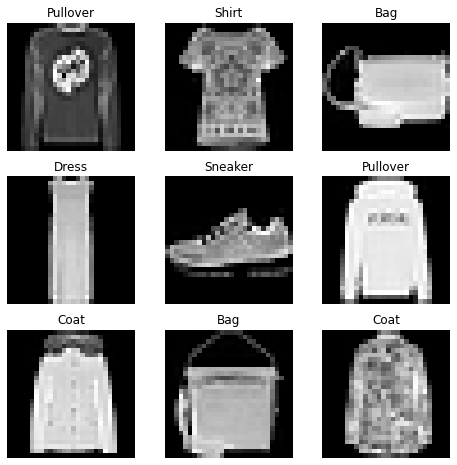

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file, names=["file_name", "label"])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label



In [11]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testing_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])
<class 'torch.Tensor'>
tensor([0, 2, 2, 4, 2, 7, 3, 6, 1, 4, 2, 3, 4, 7, 4, 6, 7, 2, 6, 2, 1, 2, 4, 4,
        4, 2, 6, 2, 5, 9, 6, 2, 7, 2, 7, 9, 6, 8, 7, 6, 1, 5, 9, 6, 3, 0, 6, 7,
        8, 4, 3, 0, 2, 4, 2, 4, 8, 5, 0, 7, 9, 7, 8, 4])
<class 'torch.Tensor'>
tensor(0)
<class 'torch.Tensor'>
<class 'torch.Tensor'>


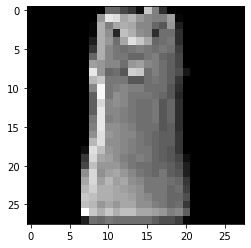

Label: 0


In [16]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

print(type(train_labels))
print(train_labels)

print(type(train_labels[0]))
print(train_labels[0])

print(type(train_features))
#print(train_features)

print(type(train_features[0]))
#print(train_features[0])

img = train_features[0].squeeze()
# https://pytorch.org/docs/stable/generated/torch.squeeze.html
# squeeze에 대한 설명이 위 링크에 있다.
# 간단하게 말하면 shape가 (3,1,4,5,1,6)라고 하면 squeeze를 사용하면 (3,4,5,6)이된다.
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
import torch
from torchvision.transforms import ToTensor, Lambda

# 항상 데이터 셋이 최종 연산을 위한 형태로 제공 x
# 따라서 지도학습의 경우에 feature 정규화와 label에 대한 정규화가 이루어져야한다.
# feature 정규화는 transform, label 정규화는 target_transform을 통해서 진행된다.
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)
# 한가지 중요한 사실은 학습을 위해서는 모두 텐서로 데이터를 가공할 필요가 있다는 것이다.
# 이를 위해서 ToTensor와 lambda식을 이용해서 tensor로 데이터를 정규화 가능하다.